In [113]:
# create a YOY RPI prediction using sarimax
#1. import the correct df from gcp
#2. follow the previous code.
!pwd

/home/nasonn/code/AltInt/Inflation_prediction/notebooks


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
final_df = pd.read_csv('../data/final_df_inc_YOY.csv',index_col=1)  
final_df.drop(columns='Unnamed: 0', inplace=True)
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,CPI_YOY
Date,,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN,3.132530
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN,2.877698
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN,2.380952
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN,2.127660
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN,1.760563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812,9.433962
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765,10.062893
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693,NaN


In [4]:
final_df.index = pd.to_datetime(final_df.index)

In [5]:
RPI_YOY_df = final_df[['RPI YOY']].copy()
RPI_YOY_df

,RPI YOY
Date,
2009-01-01,0.142993
2009-02-01,0.000000
2009-03-01,-0.377181
2009-04-01,-1.168224
2009-05-01,-1.069270
...,...
2022-05-01,11.659490
2022-06-01,11.842105
2022-07-01,12.340426


In [6]:
dataframes1 = {}
est_frames1 = {}

for i in range(8):
    year = 10 + i
    dataframes1[f'df_RPI_{year}_{year+5}'] = RPI_YOY_df[(year-9)*12:(year-9)*12+60]
    dataframes1[f'df_RPI_{year+5}_{year+6}'] = RPI_YOY_df[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames1[f'df_RPI_{year+5}_{year+6}'] = dataframes1[f'df_RPI_{year+5}_{year+6}']
dataframes1

{'df_RPI_10_15':              RPI YOY
 Date                
 2010-01-01  3.712518
 2010-02-01  3.689688
 2010-03-01  4.448651
 2010-04-01  5.342790
 2010-05-01  5.075188
 2010-06-01  5.014058
 2010-07-01  4.779756
 2010-08-01  4.710821
 2010-09-01  4.644682
 2010-10-01  4.537037
 2010-11-01  4.709141
 2010-12-01  4.770642
 2011-01-01  5.094080
 2011-02-01  5.520073
 2011-03-01  5.346624
 2011-04-01  5.206463
 2011-05-01  5.187835
 2011-06-01  4.953146
 2011-07-01  4.964222
 2011-08-01  5.167038
 2011-09-01  5.592543
 2011-10-01  5.403012
 2011-11-01  5.158730
 2011-12-01  4.816112
 2012-01-01  3.930131
 2012-02-01  3.718115
 2012-03-01  3.569892
 2012-04-01  3.455631
 2012-05-01  3.061224
 2012-06-01  2.806122
 2012-07-01  3.152961
 2012-08-01  2.922490
 2012-09-01  2.648172
 2012-10-01  3.193277
 2012-11-01  2.976939
 2012-12-01  3.091061
 2013-01-01  3.277311
 2013-02-01  3.209671
 2013-03-01  3.280731
 2013-04-01  2.886598
 2013-05-01  3.135314
 2013-06-01  3.267163
 2013-07-01  3.1

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


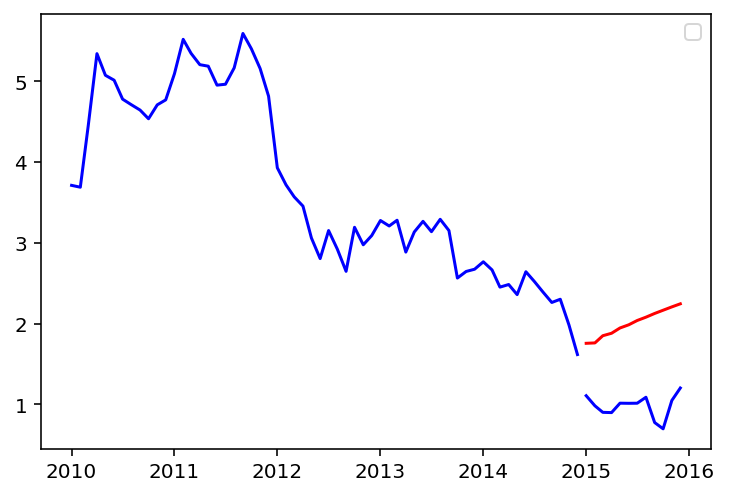

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

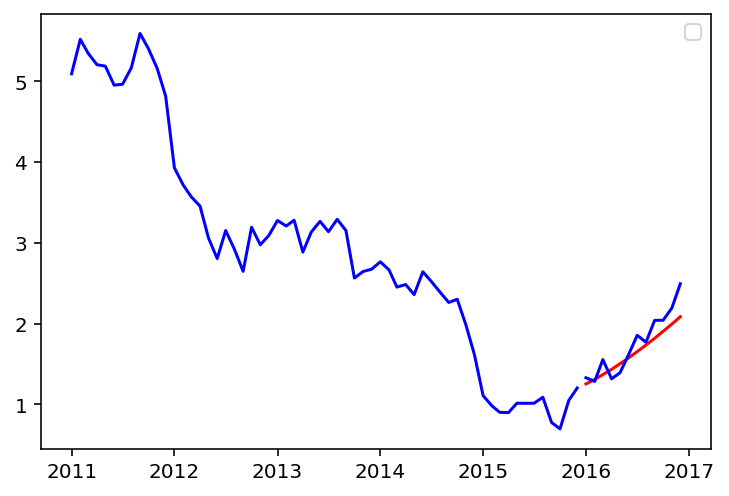

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

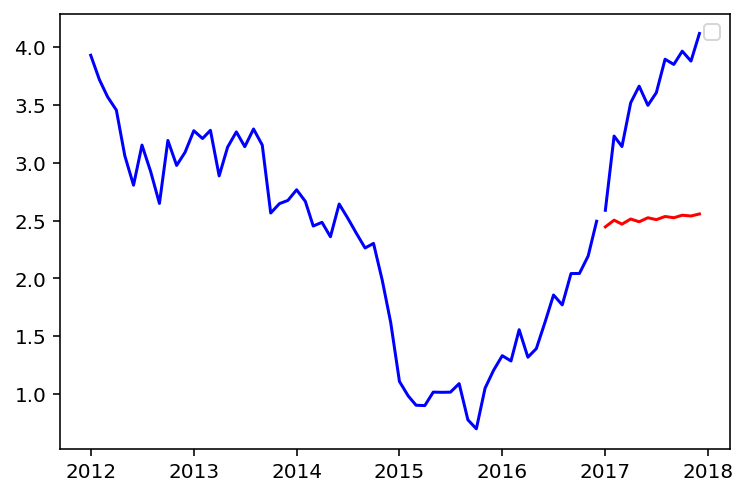

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

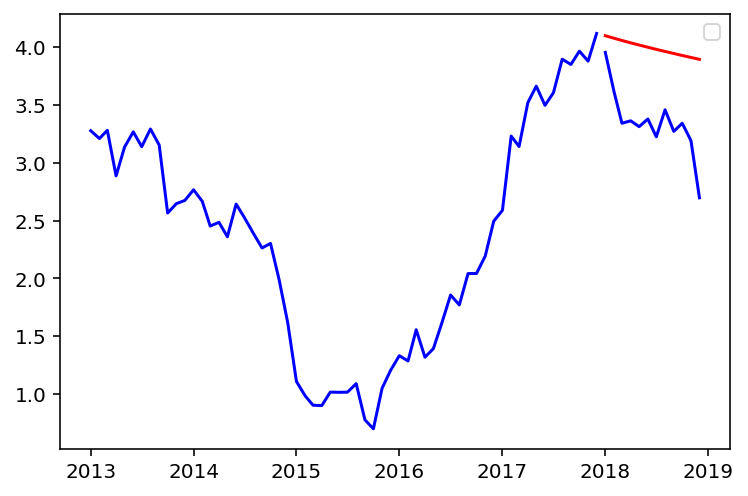

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

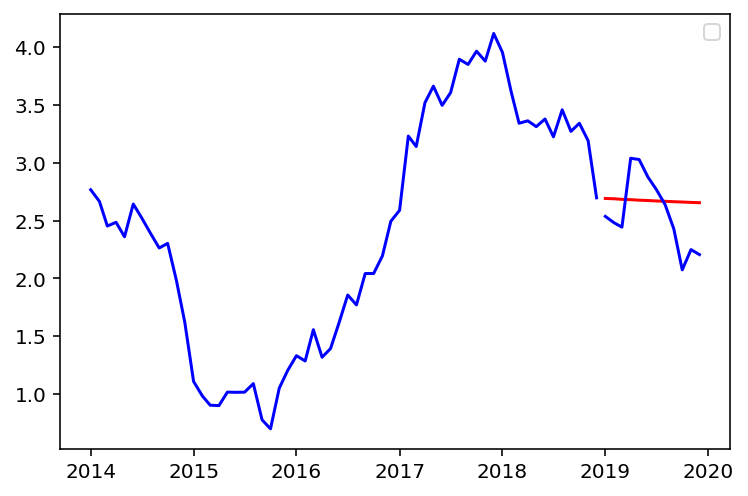

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

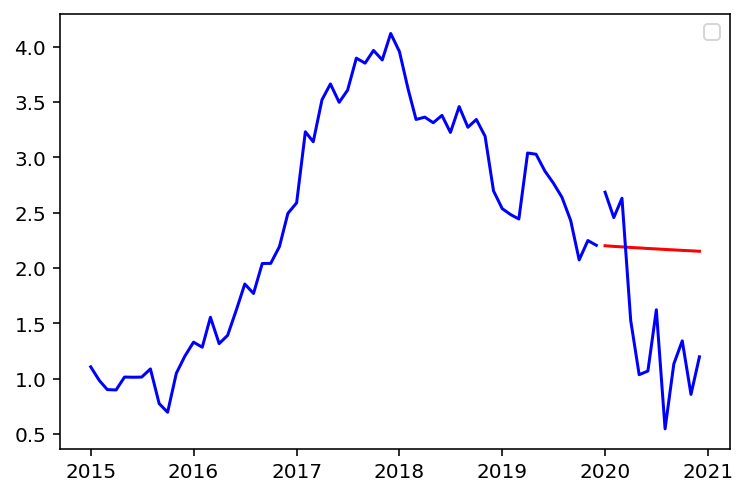

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


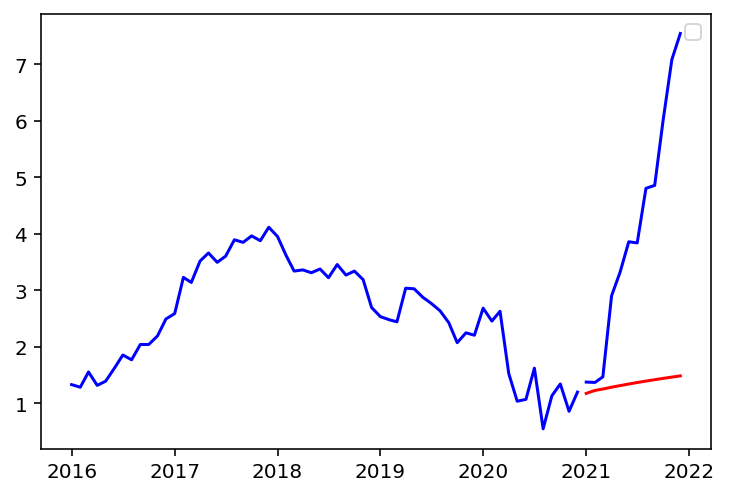

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

ValueError: x and y must have same first dimension, but have shapes (9,) and (12,)

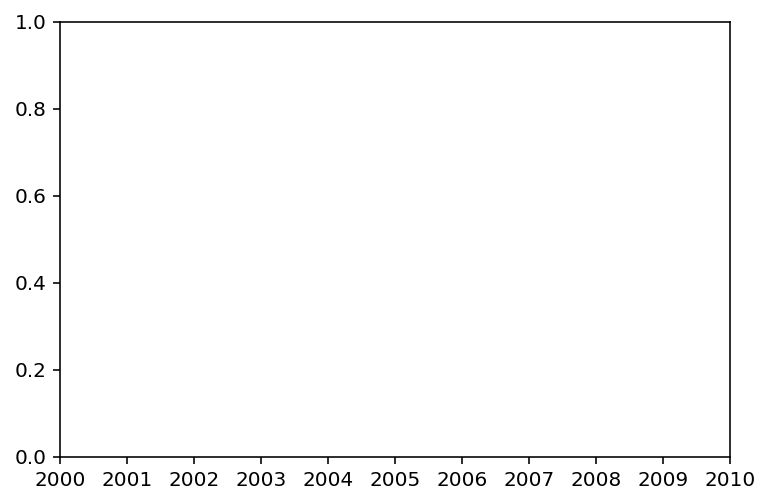

In [7]:
mape_list = []
YOY_error_0_list = []

for i in range(8):
    year = 10 + i
    df5y = dataframes1[f'df_RPI_{year}_{year+5}']
    df5y1y = dataframes1[f'df_RPI_{year+5}_{year+6}']
    
    model=sm.tsa.arima.ARIMA(df5y,order=(2, 0, 1))
    
    results=model.fit()

    abc = results.predict(start=60,end=71,dynamic=True)
    aaa = pd.DataFrame(abc)
    est_frames1[f'df_RPI_{year+5}_{year+6}'] = aaa.copy()

    fig1 = plt.plot(df5y1y.index,aaa['predicted_mean'], 'r')
    fig2 = plt.plot(df5y1y, 'b')
    fig3 = plt.plot(df5y, 'b')
    plt.legend()
    plt.show()

    mape = 0
    YOY_error_0 = 0
    for i in range(12):
        if i == 0:
            YOY_error_0 = (aaa[['predicted_mean']].iloc[i,0]/df5y.iloc[49,0]) - (df5y1y.iloc[i,0]/df5y.iloc[49,0]) 
        mape = (mape + abs((aaa[['predicted_mean']].iloc[i,0]/df5y1y.iloc[i,0]) - 1))
        mape = mape/12
    mape_list.append(mape)
    YOY_error_0_list.append(YOY_error_0)
    

In [8]:
mape

0.07291675044436625

In [9]:
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,CPI_YOY
Date,,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN,3.132530
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN,2.877698
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN,2.380952
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN,2.127660
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN,1.760563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812,9.433962
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765,10.062893
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693,NaN


In [10]:
ng_YOY_df = final_df[['ng_YOY']]
ng_YOY_df_2010 = ng_YOY_df.iloc[12:]

In [11]:
RPI_YOY_df_2010 = RPI_YOY_df.iloc[12:]
RPI_YOY_df_2010

,RPI YOY
Date,
2010-01-01,3.712518
2010-02-01,3.689688
2010-03-01,4.448651
2010-04-01,5.342790
2010-05-01,5.075188
...,...
2022-05-01,11.659490
2022-06-01,11.842105
2022-07-01,12.340426


In [12]:
dataframes2 = {}
est_frames2 = {}

for i in range(8):
    year = 9 + i
    dataframes2[f'df_RPI_YOY{year+1}_{year+6}'] = RPI_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes2[f'df_RPI_YOY{year+6}_{year+7}'] = RPI_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames2[f'df_RPI_YOY{year+6}_{year+7}'] = dataframes2[f'df_RPI_YOY{year+6}_{year+7}']
dataframes2

{'df_RPI_YOY10_15':              RPI YOY
 Date                
 2010-01-01  3.712518
 2010-02-01  3.689688
 2010-03-01  4.448651
 2010-04-01  5.342790
 2010-05-01  5.075188
 2010-06-01  5.014058
 2010-07-01  4.779756
 2010-08-01  4.710821
 2010-09-01  4.644682
 2010-10-01  4.537037
 2010-11-01  4.709141
 2010-12-01  4.770642
 2011-01-01  5.094080
 2011-02-01  5.520073
 2011-03-01  5.346624
 2011-04-01  5.206463
 2011-05-01  5.187835
 2011-06-01  4.953146
 2011-07-01  4.964222
 2011-08-01  5.167038
 2011-09-01  5.592543
 2011-10-01  5.403012
 2011-11-01  5.158730
 2011-12-01  4.816112
 2012-01-01  3.930131
 2012-02-01  3.718115
 2012-03-01  3.569892
 2012-04-01  3.455631
 2012-05-01  3.061224
 2012-06-01  2.806122
 2012-07-01  3.152961
 2012-08-01  2.922490
 2012-09-01  2.648172
 2012-10-01  3.193277
 2012-11-01  2.976939
 2012-12-01  3.091061
 2013-01-01  3.277311
 2013-02-01  3.209671
 2013-03-01  3.280731
 2013-04-01  2.886598
 2013-05-01  3.135314
 2013-06-01  3.267163
 2013-07-01  

In [13]:
dataframes3 = {}
est_frames3 = {}

for i in range(8):
    year = 9 + i
    dataframes3[f'df_ng_YOY{year+1}_{year+6}'] = ng_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes3[f'df_ng_YOY{year+6}_{year+7}'] = ng_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames3[f'df_ng_YOY{year+6}_{year+7}'] = dataframes3[f'df_ng_YOY{year+6}_{year+7}']
dataframes3

{'df_ng_YOY10_15':                ng_YOY
 Date                 
 2010-01-01 -24.470363
 2010-02-01   2.588071
 2010-03-01  10.795657
 2010-04-01  19.494994
 2010-05-01  41.778599
 2010-06-01  66.151094
 2010-07-01  89.623008
 2010-08-01  81.386120
 2010-09-01  61.538993
 2010-10-01  52.097535
 2010-11-01  74.917154
 2010-12-01  63.021044
 2011-01-01  50.048736
 2011-02-01  42.094988
 2011-03-01  67.953609
 2011-04-01  52.604576
 2011-05-01  30.818082
 2011-06-01  14.629593
 2011-07-01  18.361058
 2011-08-01  25.404346
 2011-09-01  32.303446
 2011-10-01  30.998194
 2011-11-01  26.697035
 2011-12-01  14.115332
 2012-01-01   4.148653
 2012-02-01  10.883630
 2012-03-01   4.146586
 2012-04-01   9.038873
 2012-05-01   7.180272
 2012-06-01   7.160412
 2012-07-01  10.848994
 2012-08-01  10.960689
 2012-09-01   2.177853
 2012-10-01   7.583514
 2012-11-01  10.483063
 2012-12-01   9.679251
 2013-01-01  13.301285
 2013-02-01  10.362302
 2013-03-01  13.186160
 2013-04-01  11.728564
 2013-05-01  12.

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

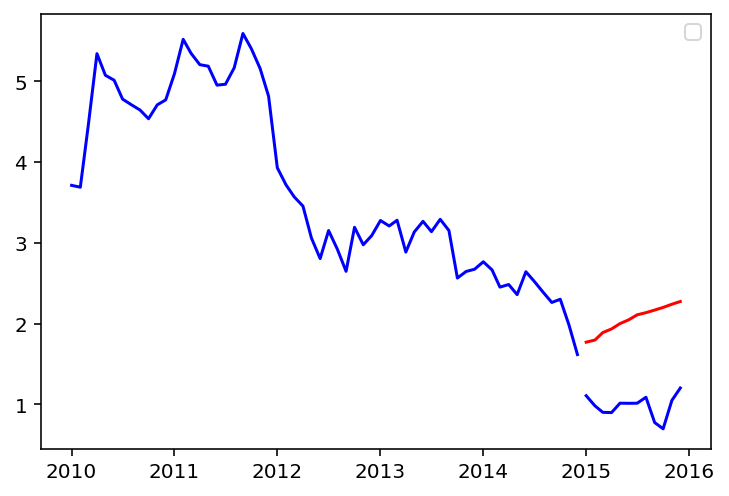

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

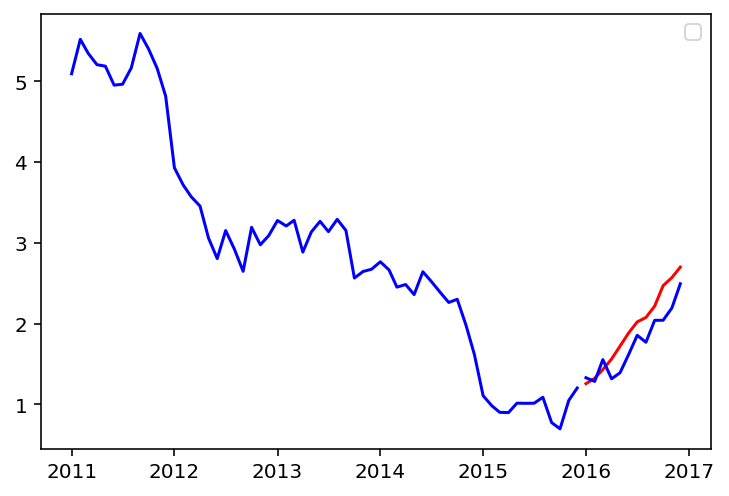

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

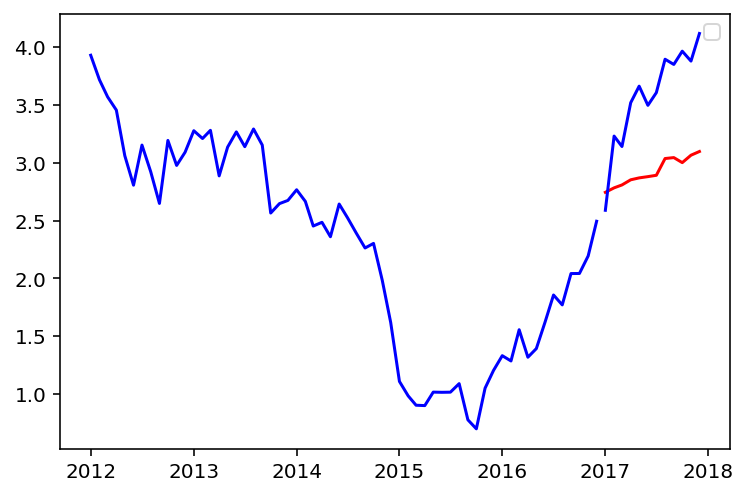

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

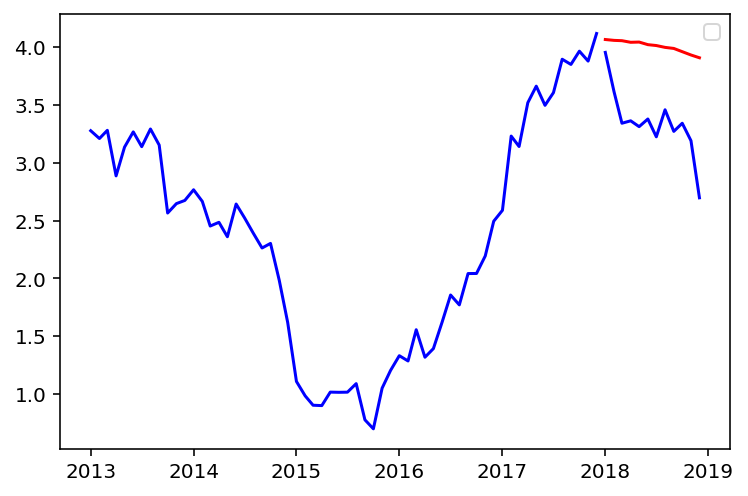

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

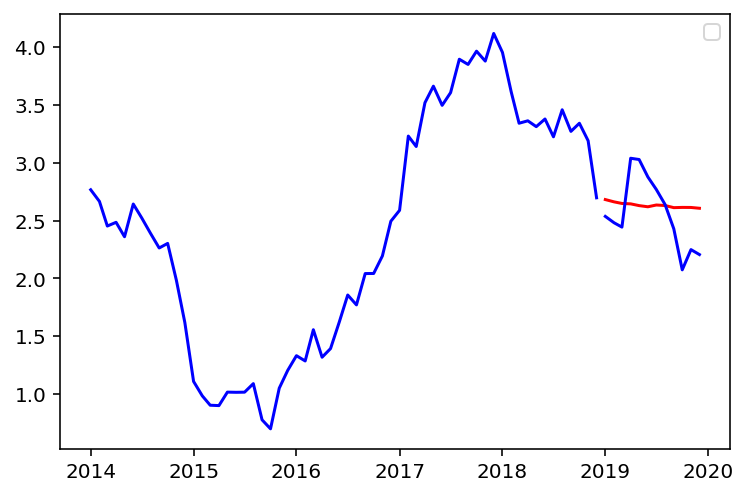

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

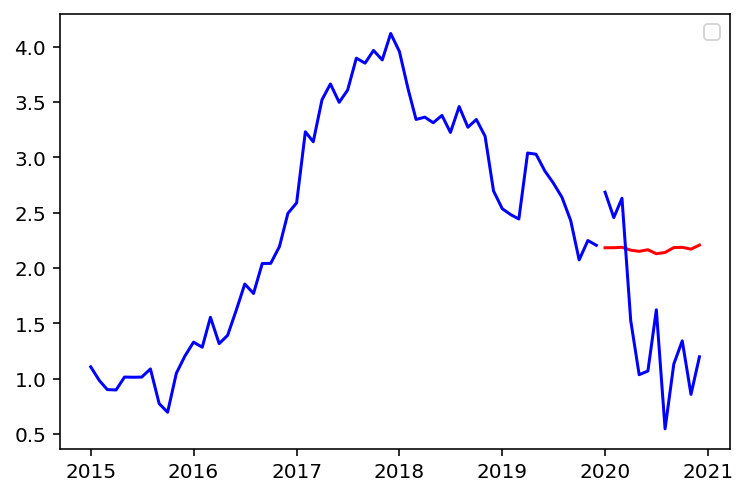

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

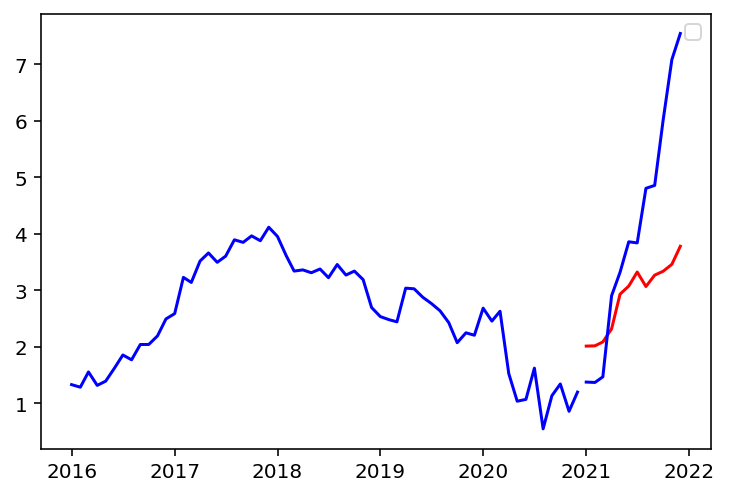

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

ValueError: Provided exogenous values are not of the appropriate shape. Required (12, 1), got (9, 1).

In [14]:
mape_list = []
YOY_error_0_list = []

for i in range(8):
    year = 9 + i
    df5y = dataframes2[f'df_RPI_YOY{year+1}_{year+6}']
    df5y1y = dataframes2[f'df_RPI_YOY{year+6}_{year+7}']
    df5yng = dataframes3[f'df_ng_YOY{year+1}_{year+6}']
    df5yng1y = dataframes3[f'df_ng_YOY{year+6}_{year+7}']
    
    model=sm.tsa.arima.ARIMA(df5y,exog=df5yng,order=(2, 0, 1))
    
    results=model.fit()

    abc = results.predict(start=60,end=71,dynamic=True, exog=df5yng1y)
    aaa = pd.DataFrame(abc)
    est_frames3[f'df_RPI_{year+5}_{year+6}'] = aaa.copy()

    fig1 = plt.plot(df5y1y.index,aaa['predicted_mean'], 'r')
    fig2 = plt.plot(df5y1y, 'b')
    fig3 = plt.plot(df5y, 'b')
    plt.legend()
    plt.show()

    mape = 0
    YOY_error_0 = 0
    for i in range(12):
        if i == 0:
            YOY_error_0 = (aaa[['predicted_mean']].iloc[i,0]/df5y.iloc[49,0]) - (df5y1y.iloc[i,0]/df5y.iloc[49,0]) 
        mape = (mape + abs((aaa[['predicted_mean']].iloc[i,0]/df5y1y.iloc[i,0]) - 1))
        mape = mape/12
    mape_list.append(mape)
    YOY_error_0_list.append(YOY_error_0)

In [15]:
mape

0.04542149147878823

In [16]:
# average mape has decreased from 7% to 4% but does not compete with the already existing sarimax model which has mape roughly 0.5%

In [17]:
#add another exogenous variable into the model
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,CPI_YOY
Date,,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN,3.132530
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN,2.877698
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN,2.380952
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN,2.127660
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN,1.760563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812,9.433962
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765,10.062893
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693,NaN


In [18]:
HPI_YOY_df = final_df[['Nationwide_HPI_YOY']]
HPI_YOY_df_2010 = HPI_YOY_df.iloc[12:]

In [19]:
HPI_YOY_df_2010

,Nationwide_HPI_YOY
Date,
2010-01-01,8.627582
2010-02-01,9.195792
2010-03-01,9.000332
2010-04-01,10.498514
2010-05-01,9.863281
...,...
2022-05-01,11.147812
2022-06-01,10.661765
2022-07-01,11.042693


In [20]:
dataframes4 = {}
est_frames4 = {}

for i in range(8):
    year = 9 + i
    dataframes4[f'df_HPI_YOY{year+1}_{year+6}'] = HPI_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes4[f'df_HPI_YOY{year+6}_{year+7}'] = HPI_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames4[f'df_HPI_YOY{year+6}_{year+7}'] = dataframes4[f'df_HPI_YOY{year+6}_{year+7}']
dataframes4

{'df_HPI_YOY10_15':             Nationwide_HPI_YOY
 Date                          
 2010-01-01            8.627582
 2010-02-01            9.195792
 2010-03-01            9.000332
 2010-04-01           10.498514
 2010-05-01            9.863281
 2010-06-01            8.747196
 2010-07-01            6.595140
 2010-08-01            3.942428
 2010-09-01            3.066914
 2010-10-01            1.392327
 2010-11-01            0.215584
 2010-12-01            0.092764
 2011-01-01           -1.379945
 2011-02-01           -0.093226
 2011-03-01            0.152346
 2011-04-01           -1.284733
 2011-05-01           -1.155556
 2011-06-01           -1.119623
 2011-07-01           -0.355240
 2011-08-01           -0.361228
 2011-09-01           -0.300571
 2011-10-01            0.854440
 2011-11-01            1.628765
 2011-12-01            0.957677
 2012-01-01            0.621891
 2012-02-01            0.964230
 2012-03-01           -0.882263
 2012-04-01           -0.907990
 2012-05-01          

In [21]:
arr1 = np.array(dataframes3['df_ng_YOY12_17'])

In [22]:
arr2 = np.array(dataframes4['df_HPI_YOY12_17'])

In [23]:
arrall = np.array([arr1,arr2])

In [24]:
arrallshape = arrall.reshape(60,2)

In [25]:
arrallshape.shape

(60, 2)

In [26]:
exog = arrallshape

In [27]:
arr3 = np.array(dataframes3['df_ng_YOY17_18'])

In [28]:
arr4 = np.array(dataframes4['df_HPI_YOY17_18'])

In [29]:
arratst = np.array([arr3,arr4]).reshape(12,2)
arratst

array([[56.27193417, 51.04430663],
       [43.06667388, 40.44072065],
       [31.44288208, 21.63504525],
       [12.66718807, 37.70084863],
       [29.17930445,  8.41121436],
       [15.30013597, 14.85778666],
       [ 4.25261013,  4.50496309],
       [ 3.52941176,  2.60029718],
       [ 2.133922  ,  3.081438  ],
       [ 2.89961014,  2.11575875],
       [ 2.31143552,  2.50730282],
       [ 2.47064579,  2.55661066]])

In [30]:
model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY12_17'],exog=exog,order=(2, 0, 1))
results=model.fit()

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

In [31]:
abc = results.predict(start=60,end=71,dynamic=True, exog=arratst)



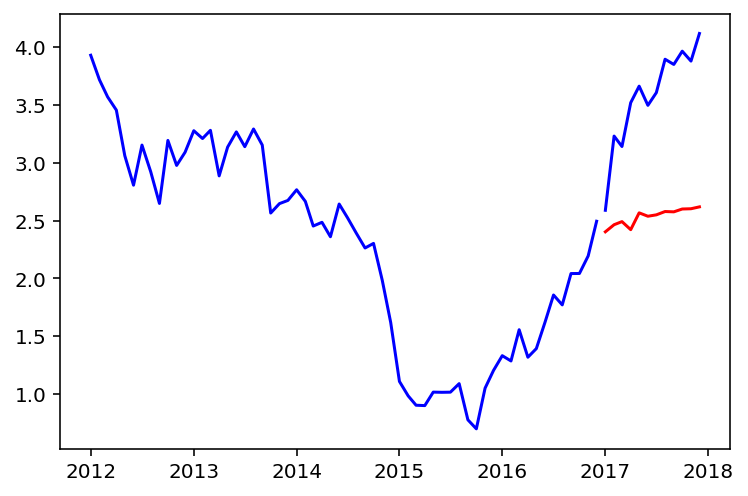

In [32]:
plt.plot(abc, 'r')
plt.plot(dataframes2['df_RPI_YOY17_18'], 'b')
plt.plot(dataframes2['df_RPI_YOY12_17'], 'b')

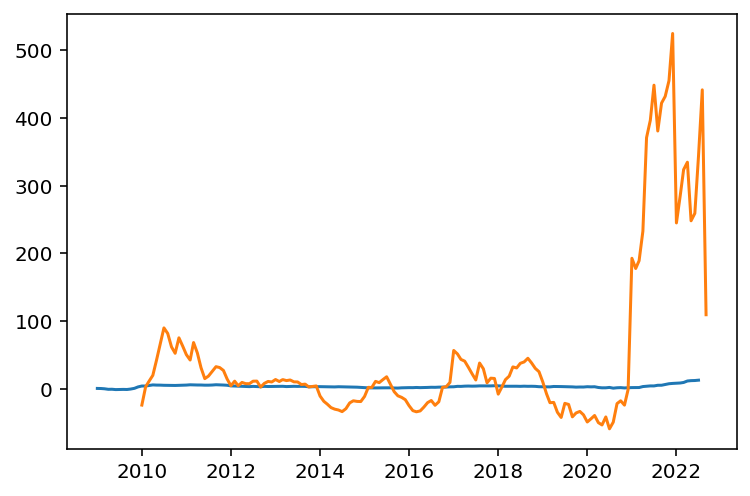

In [33]:
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['ng_YOY'])

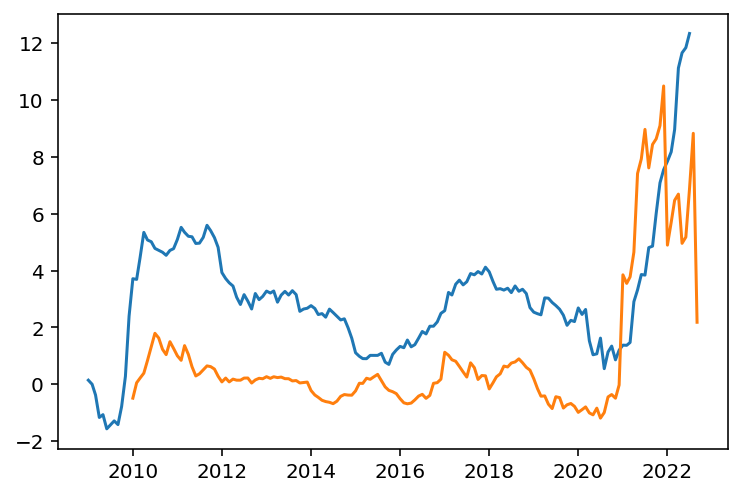

In [34]:
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['ng_YOY']*0.02)

In [35]:
#multiplying natural gas by 0.02 there seems to be much of a correlation therefore, could be a far better indicator 


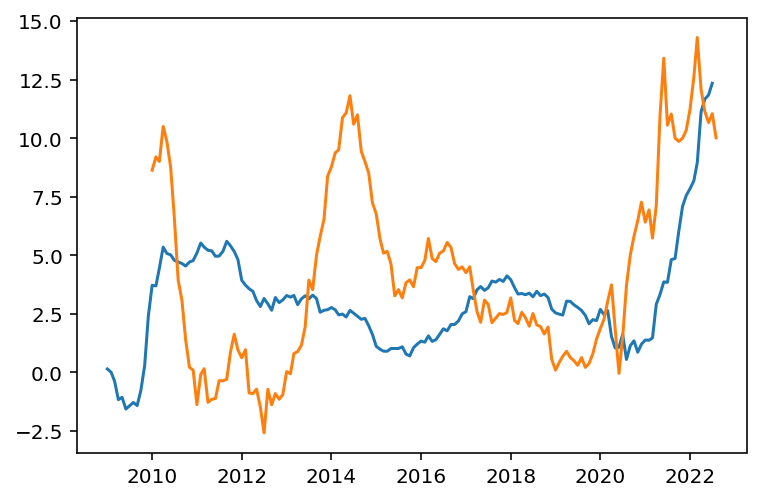

In [36]:
final_df
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['Nationwide_HPI_YOY'])
# this seems very useful for predicting inflation particularly in the last 5 years 

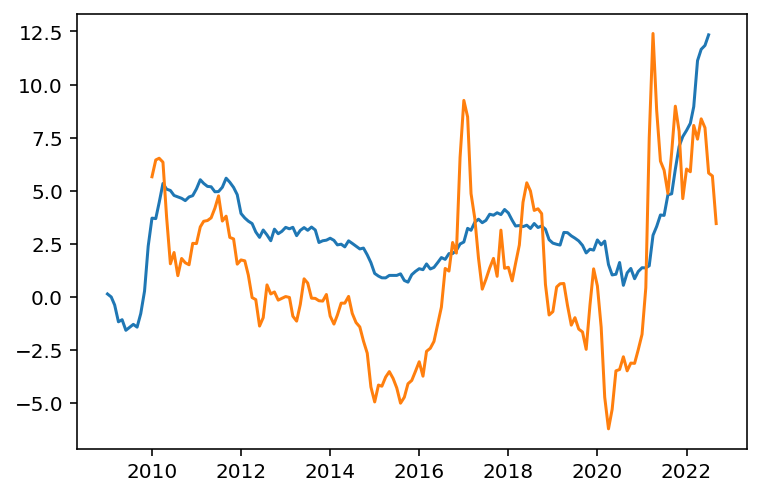

In [37]:
final_df
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['Brent_Crude_YOY']*0.1)
 

In [38]:
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,CPI_YOY
Date,,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN,3.132530
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN,2.877698
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN,2.380952
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN,2.127660
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN,1.760563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812,9.433962
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765,10.062893
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693,NaN


In [39]:
currency_series = final_df['GBP Curncy']
currency_series

Date
2009-01-01    1.479027
2009-02-01    1.492643
2009-03-01    1.494241
2009-04-01    1.511936
2009-05-01    1.561252
                ...   
2022-05-01    1.247484
2022-06-01    1.233611
2022-07-01    1.231479
2022-08-01    1.211816
2022-09-01    1.272420
Name: GBP Curncy, Length: 165, dtype: float64

In [40]:
pct_change_list = []
for index, val in enumerate(currency_series):
    try:
        old = val
        new = currency_series[index+12]
        pct_change = ((new-old)/old)*100
        pct_change_list.append(pct_change)
        
    except:
        break
pct_change_list

[7.597745446946075,
 3.6215724745178695,
 1.9689593218870916,
 2.07981336395832,
 -4.418225683510267,
 -5.533111568908985,
 -5.2370203930354355,
 -4.072007356531875,
 -2.5926862906713843,
 -2.689170855046105,
 -3.573699488549973,
 -2.069843390059148,
 0.5509728426656862,
 4.595182272614366,
 5.766723424058968,
 5.5439059444431305,
 8.357889851036358,
 6.154958547651603,
 4.9641208304897475,
 5.013428564876272,
 1.5207368592086987,
 1.7014363365825644,
 0.7057298522076599,
 1.1365679146709387,
 -2.0756056891747017,
 -2.200333200538178,
 -1.5330509148025353,
 -1.8420171443878857,
 -2.489293653194903,
 -2.4291149813078348,
 -2.5396440425342117,
 -3.012833212879539,
 1.3941704600855724,
 0.14557376230407612,
 0.6082147817759848,
 2.007912413575552,
 0.5702974461823016,
 -2.295398458395923,
 -3.3092699719180336,
 -3.1511785648901607,
 -2.9336400561421043,
 -0.7644413745658524,
 -1.8400300413067918,
 -1.428201513364213,
 -0.9120258392711748,
 -0.09477135343738037,
 0.4572839204229599,
 0.207

In [41]:
nan_lst = [np.nan,]*12

In [42]:
nan_lst.extend(pct_change_list)

In [43]:
currency_GBP_YOY_list = nan_lst

In [44]:
final_df['GBP_YOY'] = currency_GBP_YOY_list

In [45]:
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,CPI_YOY,GBP_YOY
Date,,,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN,3.132530,NaN
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN,2.877698,NaN
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN,2.380952,NaN
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN,2.127660,NaN
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN,1.760563,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812,9.433962,-10.857228
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765,10.062893,-10.911963
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693,NaN,-10.640541


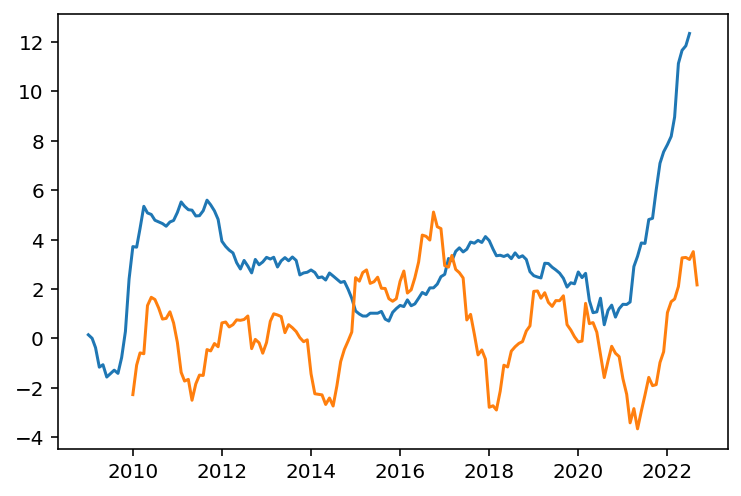

In [46]:
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['GBP_YOY']*-.3)

In [47]:
#create a model to predict inflation in 2020 using price of brent crude, currency, House price index 
GBP_YOY_df = final_df[['GBP_YOY']]
GBP_YOY_df_2010 = GBP_YOY_df.iloc[12:]

In [48]:
dataframes5 = {}
est_frames5 = {}

for i in range(8):
    year = 9 + i
    dataframes5[f'df_GBP_YOY{year+1}_{year+6}'] = GBP_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes5[f'df_GBP_YOY{year+6}_{year+7}'] = GBP_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames5[f'df_GBP_YOY{year+6}_{year+7}'] = dataframes5[f'df_GBP_YOY{year+6}_{year+7}']
dataframes5

{'df_GBP_YOY10_15':              GBP_YOY
 Date                
 2010-01-01  7.597745
 2010-02-01  3.621572
 2010-03-01  1.968959
 2010-04-01  2.079813
 2010-05-01 -4.418226
 2010-06-01 -5.533112
 2010-07-01 -5.237020
 2010-08-01 -4.072007
 2010-09-01 -2.592686
 2010-10-01 -2.689171
 2010-11-01 -3.573699
 2010-12-01 -2.069843
 2011-01-01  0.550973
 2011-02-01  4.595182
 2011-03-01  5.766723
 2011-04-01  5.543906
 2011-05-01  8.357890
 2011-06-01  6.154959
 2011-07-01  4.964121
 2011-08-01  5.013429
 2011-09-01  1.520737
 2011-10-01  1.701436
 2011-11-01  0.705730
 2011-12-01  1.136568
 2012-01-01 -2.075606
 2012-02-01 -2.200333
 2012-03-01 -1.533051
 2012-04-01 -1.842017
 2012-05-01 -2.489294
 2012-06-01 -2.429115
 2012-07-01 -2.539644
 2012-08-01 -3.012833
 2012-09-01  1.394170
 2012-10-01  0.145574
 2012-11-01  0.608215
 2012-12-01  2.007912
 2013-01-01  0.570297
 2013-02-01 -2.295398
 2013-03-01 -3.309270
 2013-04-01 -3.151179
 2013-05-01 -2.933640
 2013-06-01 -0.764441
 2013-07-01 -

In [49]:
#psudeocode
#1. create a df for b crude
#2.run through the for loop to create different series
#3. create two new arrays
#4. run through the procedure as you have done before. 


In [50]:
B_crude_YOY_df = final_df[['Brent_Crude_YOY']]
B_crude_YOY_df_2010 = B_crude_YOY_df.iloc[12:]

In [51]:
dataframes6 = {}
est_frames6 = {}

for i in range(8):
    year = 9 + i
    dataframes6[f'df_B_crude_YOY{year+1}_{year+6}'] = B_crude_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes6[f'df_B_crude_YOY{year+6}_{year+7}'] = B_crude_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames6[f'df_B_crude_YOY{year+6}_{year+7}'] = dataframes6[f'df_B_crude_YOY{year+6}_{year+7}']
dataframes6

{'df_B_crude_YOY10_15':             Brent_Crude_YOY
 Date                       
 2010-01-01        56.592974
 2010-02-01        64.509534
 2010-03-01        65.315031
 2010-04-01        63.462765
 2010-05-01        37.503581
 2010-06-01        15.618681
 2010-07-01        20.942718
 2010-08-01        10.034994
 2010-09-01        18.133912
 2010-10-01        16.110481
 2010-11-01        15.170731
 2010-12-01        25.257028
 2011-01-01        25.142686
 2011-02-01        32.987779
 2011-03-01        35.640833
 2011-04-01        35.999700
 2011-05-01        37.262024
 2011-06-01        41.818165
 2011-07-01        47.609326
 2011-08-01        35.742883
 2011-09-01        38.054623
 2011-10-01        28.048329
 2011-11-01        27.341732
 2011-12-01        15.454473
 2012-01-01        17.447200
 2012-02-01        17.020394
 2012-03-01        10.300589
 2012-04-01        -0.278632
 2012-05-01        -1.237866
 2012-06-01       -13.684139
 2012-07-01        -9.724939
 2012-08-01         

In [52]:
#using just the first 3 exog variables was not particularly successful therefore now you are using brent crude 

In [53]:
arr1 = np.array(dataframes3['df_ng_YOY16_21'])
arr2 = np.array(dataframes4['df_HPI_YOY16_21'])
arr3 = np.array(dataframes5['df_GBP_YOY16_21'])
arr4 = np.array(dataframes6['df_B_crude_YOY16_21'])

In [54]:
arrall = np.array([arr1,arr2,arr3,arr4])

In [55]:
arrallshape = arrall.reshape(60,4)

In [56]:
arrallshape.shape

(60, 4)

In [57]:
exog = arrallshape

In [58]:
arr5 = np.array(dataframes3['df_ng_YOY21_22'])
arr6 = np.array(dataframes4['df_HPI_YOY21_22'])
arr7 = np.array(dataframes5['df_GBP_YOY21_22'])
arr8 = np.array(dataframes6['df_B_crude_YOY21_22'])

In [59]:
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(12,4)
arratst

array([[192.49580144, 177.40135827, 188.92705512, 232.51645609],
       [370.7443026 , 396.45100665, 448.31445424, 380.57153984],
       [421.80143171, 431.7690558 , 454.97221912, 524.69053076],
       [  6.40817274,   6.93574577,   5.73059361,   7.12840117],
       [ 10.92283032,  13.41209173,  10.55139551,  11.02661597],
       [  9.9977832 ,   9.8569857 ,   9.99345407,  10.33210332],
       [  5.44523964,   7.55711018,  11.40858748,   9.4885444 ],
       [ 12.21595465,   9.82619008,   7.65146584,   5.27391805],
       [  6.39248731,   6.24709201,   3.26524237,   1.81357982],
       [-17.60259834,   4.37657849,  74.84629562, 124.04745533],
       [ 87.81015354,  63.9339062 ,  59.67063833,  48.78078108],
       [ 68.07112431,  89.82258145,  78.01975085,  46.30447977]])

In [60]:
#auto arimax does not exist therefore create your own grid search using three different for loops for p,d,q

In [61]:
preds = {}
for p in range(5):
    for d in range(5):
        for q in range(5):
            model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY16_21'],exog=exog,order=(p, d, q))
            model=model.fit()
            ypred = model.predict(start=60,end=71,dynamic=True, exog=arratst)
            preds[p,d,q]=ypred


/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

In [62]:
preds.keys()
# the acutal values are dataframes2['df_RPI_YOY21_22']
for key in preds.keys():
    print(key)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)
(0, 4, 0)
(0, 4, 1)
(0, 4, 2)
(0, 4, 3)
(0, 4, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(1, 3, 0)
(1, 3, 1)
(1, 3, 2)
(1, 3, 3)
(1, 3, 4)
(1, 4, 0)
(1, 4, 1)
(1, 4, 2)
(1, 4, 3)
(1, 4, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(2, 3, 0)
(2, 3, 1)
(2, 3, 2)
(2, 3, 3)
(2, 3, 4)
(2, 4, 0)
(2, 4, 1)
(2, 4, 2)
(2, 4, 3)
(2, 4, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(3, 3, 0)
(3, 3, 1)
(3, 3, 2)
(3, 3, 3)
(3, 3, 4)
(3, 4, 0)
(3, 4, 1)
(3, 4, 2)
(3, 4, 3)
(3, 4, 4)


In [63]:
dataframes2['df_RPI_YOY21_22']['RPI YOY']

    

Date
2021-01-01    1.376462
2021-02-01    1.369863
2021-03-01    1.469583
2021-04-01    2.904990
2021-05-01    3.319644
2021-06-01    3.860608
2021-07-01    3.840925
2021-08-01    4.807364
2021-09-01    4.858987
2021-10-01    6.014271
2021-11-01    7.086882
2021-12-01    7.549086
Name: RPI YOY, dtype: float64

In [64]:
 preds[(0, 0, 0)]

2021-01-01    2.078585
2021-02-01    3.275754
2021-03-01    2.068139
2021-04-01    2.551466
2021-05-01    2.566403
2021-06-01    2.555988
2021-07-01    2.610894
2021-08-01    2.541299
2021-09-01    2.556131
2021-10-01    2.765290
2021-11-01    2.343246
2021-12-01    2.890273
Freq: MS, Name: predicted_mean, dtype: float64

mape - mean absolute percentsge error

In [66]:
(preds[(0, 0, 0)] - dataframes2['df_RPI_YOY21_22']['RPI YOY']) * 100 

2021-01-01     70.212281
2021-02-01    190.589137
2021-03-01     59.855594
2021-04-01    -35.352357
2021-05-01    -75.324128
2021-06-01   -130.461976
2021-07-01   -123.003080
2021-08-01   -226.606587
2021-09-01   -230.285595
2021-10-01   -324.898115
2021-11-01   -474.363596
2021-12-01   -465.881290
Freq: MS, dtype: float64

(1/n) * Σ(|actual – prediction| / |actual|) * 100

In [69]:
error = sum(abs(dataframes2['df_RPI_YOY21_22']['RPI YOY']-preds[(4,4,4)])/abs(dataframes2['df_RPI_YOY21_22']['RPI YOY']))

In [70]:
error/12*100

15.33794053942848

In [71]:
dataframes2['df_RPI_YOY21_22']['RPI YOY']

Date
2021-01-01    1.376462
2021-02-01    1.369863
2021-03-01    1.469583
2021-04-01    2.904990
2021-05-01    3.319644
2021-06-01    3.860608
2021-07-01    3.840925
2021-08-01    4.807364
2021-09-01    4.858987
2021-10-01    6.014271
2021-11-01    7.086882
2021-12-01    7.549086
Name: RPI YOY, dtype: float64

In [72]:
for y in preds.keys():
    print(y)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)
(0, 4, 0)
(0, 4, 1)
(0, 4, 2)
(0, 4, 3)
(0, 4, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(1, 3, 0)
(1, 3, 1)
(1, 3, 2)
(1, 3, 3)
(1, 3, 4)
(1, 4, 0)
(1, 4, 1)
(1, 4, 2)
(1, 4, 3)
(1, 4, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(2, 3, 0)
(2, 3, 1)
(2, 3, 2)
(2, 3, 3)
(2, 3, 4)
(2, 4, 0)
(2, 4, 1)
(2, 4, 2)
(2, 4, 3)
(2, 4, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(3, 3, 0)
(3, 3, 1)
(3, 3, 2)
(3, 3, 3)
(3, 3, 4)
(3, 4, 0)
(3, 4, 1)
(3, 4, 2)
(3, 4, 3)
(3, 4, 4)


In [73]:
mape_lst= []
for y in preds.keys():
    percent_list = []
    for x in range(12):
        error = abs(dataframes2['df_RPI_YOY21_22']['RPI YOY'][x]-preds[y][x])/(dataframes2['df_RPI_YOY21_22']['RPI YOY'][x])
        percent_list.append(error)
    mape = sum(percent_list)/12*100
    mape_lst.append(mape)
mape_lst


[50.72897567996536,
 66.27839007457003,
 69.5171258359383,
 50.05251645018275,
 41.273405902743505,
 62.67743579857014,
 63.31451137979195,
 72.88441139148823,
 67.48984952806755,
 76.24013832961475,
 24.06284315470599,
 70.33713647150815,
 77.7331342105688,
 84.79432951791325,
 67.82523306187915,
 926.1077967267744,
 30.60119887738404,
 46.30413713607261,
 62.659854530718604,
 68.45188909727393,
 6854.1274383342125,
 964.4942420915286,
 56.91359176400922,
 22.84130430408825,
 30.619252625369665,
 56.60353071656636,
 57.22944569593839,
 63.60222094385256,
 53.72223345270113,
 71.32130528369655,
 63.81594903860712,
 63.32369404234696,
 71.49411517746516,
 68.50188521248131,
 67.71822540020533,
 75.33538106117635,
 79.81239271514305,
 79.62373154903247,
 74.70084669537354,
 82.96216664898478,
 176.1878480498712,
 72.94908433833757,
 86.91022799968421,
 85.59915890942219,
 64.87852046969465,
 2553.701302154707,
 191.46003671756685,
 60.92156949661999,
 76.0611593034339,
 55.78034493864098

In [74]:
mape_lst.index(min(mape_lst))


90

In [75]:
list(preds.keys())[90]

(3, 3, 0)

In [76]:
min(mape_lst)

9.03695806678417

In [77]:
model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY16_21'],exog=exog,order=(3, 3, 0))
results=model.fit()

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

In [78]:
abc = results.predict(start=60,end=71,dynamic=True, exog=arratst)

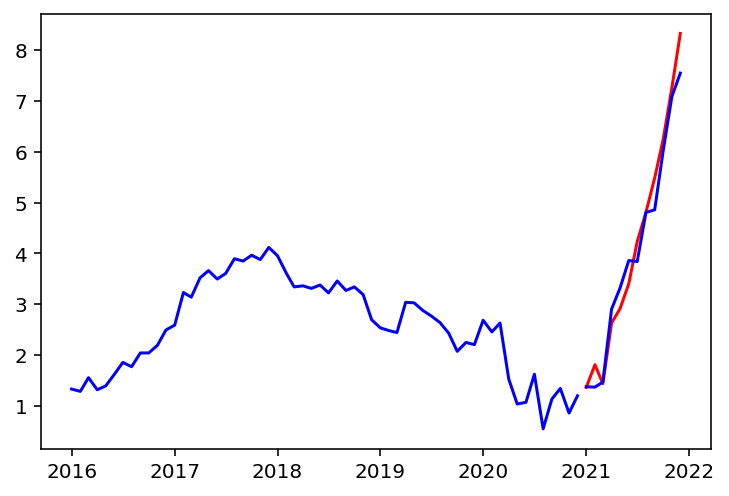

In [79]:
plt.plot(abc, 'r')
plt.plot(dataframes2['df_RPI_YOY21_22'], 'b')
plt.plot(dataframes2['df_RPI_YOY16_21'], 'b')


In [80]:
#The problem with previous model is that it requires future knowlegde of exogenous variables 

In [81]:
#in order to combat this I am going to to do monthly predictions becuase values of x variables already known pre RPI

In [82]:
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,CPI_YOY,GBP_YOY
Date,,,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN,3.132530,NaN
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN,2.877698,NaN
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN,2.380952,NaN
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN,2.127660,NaN
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN,1.760563,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812,9.433962,-10.857228
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765,10.062893,-10.911963
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693,NaN,-10.640541


In [83]:
#psuedocode.
#predict monthly for the period previously covered. 
#predict for the first month of 2021.
#remember you need to change the dimension of the exogenous variables in the predict 

In [84]:
arrr5 = np.array(dataframes3['df_ng_YOY21_22'])[0][0]
arrr6 = np.array(dataframes4['df_HPI_YOY21_22'])[0][0]
arrr7 = np.array(dataframes5['df_GBP_YOY21_22'])[0][0]
arrr8 = np.array(dataframes6['df_B_crude_YOY21_22'])[0][0]

In [85]:
arratm = np.array([arrr5,arrr6,arrr7,arrr8])
arratm.reshape(1,4)

array([[192.49580144,   6.40817274,   5.44523964, -17.60259834]])

In [86]:
model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY16_21'],exog=exog, order=(3, 3, 0))
results=model.fit()
abc = results.predict(start=60,end=60,exog = arratm,dynamic=True)

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

In [87]:
abc


2021-01-01    1.422562
Freq: MS, dtype: float64

In [88]:
dataframes2['df_RPI_YOY21_22']

,RPI YOY
Date,
2021-01-01,1.376462
2021-02-01,1.369863
2021-03-01,1.469583
2021-04-01,2.904990
2021-05-01,3.319644
2021-06-01,3.860608
2021-07-01,3.840925
2021-08-01,4.807364
2021-09-01,4.858987


In [89]:
# for jan 2021 the real RPI was 294.6
#for jan 2020 the rpi was 290.6 means that the pred was 294.69(290.6* 1.01410204)
#for this whole time period the p,d,q I am going to use are (3,3,0) because this was found optimal by the above gridsearch


In [90]:
#The new data to feed into the model is in the dataframe 
final_df[['RPI YOY']].iloc[85:145]


,RPI YOY
Date,
2016-02-01,1.285547
2016-03-01,1.555815
2016-04-01,1.317829
2016-05-01,1.392650
2016-06-01,1.622248
2016-07-01,1.856148
2016-08-01,1.770593
2016-09-01,2.041602
2016-10-01,2.042389


In [91]:
final_df.tail(32)

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,CPI_YOY,GBP_YOY
Date,,,,,,,,,,,,,,,,,,,
2020-02-01,42.943990,35.965277,1.291857,1.164014,6796.644286,2501.024605,3019.880708,7.418630,0.506938,0.649310,108.6,292.0,431.1,2.456140,-44.669642,-14.213663,2.277580,1.495327,0.369212
2020-03-01,27.211757,25.801736,1.239504,1.111822,5813.382174,2243.053117,2631.283557,6.975790,0.430326,0.619239,108.6,292.6,438.0,2.630656,-39.853128,-47.186673,3.034580,0.836431,-4.718778
2020-04-01,21.072957,17.991584,1.263773,1.139632,6002.315714,2370.656764,2666.200693,5.995653,0.391391,0.527205,108.5,292.6,444.7,1.526718,-50.429637,-62.068964,3.732214,0.556070,-1.980278
2020-05-01,25.990237,28.047836,1.247080,1.123495,6134.460000,2450.288506,2722.792714,4.950512,0.293880,0.456275,108.5,292.2,436.7,1.037344,-53.817576,-52.898586,1.842351,0.648749,-2.119432
2020-06-01,32.338286,31.462164,1.260819,1.118319,6267.593333,2475.319143,2906.093329,5.429804,0.277643,0.456286,108.6,292.7,431.7,1.070442,-42.019421,-34.780933,-0.046307,1.112141,-0.827158
2020-07-01,33.762927,31.986664,1.280167,1.112688,6244.110000,2520.160305,2990.676103,5.291466,0.194758,0.406646,109.1,294.2,440.7,1.623489,-59.565361,-34.137639,1.497006,0.184502,2.196094
2020-08-01,34.536521,31.706150,1.303548,1.117148,6163.494211,2569.477068,2952.475053,6.921193,0.179333,0.458500,108.6,293.3,447.1,0.548509,-49.734706,-28.143014,3.711436,0.552995,5.294638
2020-09-01,32.488230,30.814480,1.288886,1.106245,6078.599545,2558.413712,2949.601847,8.556717,0.145932,0.431682,109.1,294.3,451.1,1.134021,-22.294306,-34.765503,5.004655,0.738689,3.054023
2020-10-01,32.041533,31.666313,1.295946,1.114825,6064.609130,2604.212440,2912.902883,9.773120,0.166858,0.458687,109.1,294.3,454.5,1.342975,-18.106757,-31.109528,5.796089,0.368664,1.078859


In [92]:
arr1 = np.array(final_df[['ng_YOY']].iloc[85:145])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[85:145])
arr3 = np.array(final_df[['GBP_YOY']].iloc[85:145])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[85:145])

In [93]:
arrall = np.array([arr1,arr2,arr3,arr4])
arrall.shape

(4, 60, 1)

In [94]:
arrallshape = arrall.reshape(60,4)

In [95]:
exog = arrallshape

In [96]:
arr5 = np.array(dataframes3['df_ng_YOY21_22'])[1][0]
arr6 = np.array(dataframes4['df_HPI_YOY21_22'])[1][0]
arr7 = np.array(dataframes5['df_GBP_YOY21_22'])[1][0]
arr8 = np.array(dataframes6['df_B_crude_YOY21_22'])[1][0]

In [97]:
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[177.40135827,   6.93574577,   7.55711018,   4.37657849]])

In [98]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[85:145],exog=exog, order=(3, 3, 0))
results=model.fit()
abc = results.predict(start=60,end=60,exog = arratst,dynamic=True)

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [99]:
abc[0]

1.840777537347031

In [100]:
prediction2021_feb = 292 * 1.01841264
prediction2021_feb

297.37649088

In [101]:
# actual number is  296.0
percent = ((297.37649088- 296)/297.37649088)*100
percent

0.4628781770632499

In [102]:
#prediction for March

In [103]:
arr1 = np.array(final_df[['ng_YOY']].iloc[86:146])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[86:146])
arr3 = np.array(final_df[['GBP_YOY']].iloc[86:146])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[86:146])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(60,4)

In [104]:
arr5 = np.array(dataframes3['df_ng_YOY21_22'])[2][0]
arr6 = np.array(dataframes4['df_HPI_YOY21_22'])[2][0]
arr7 = np.array(dataframes5['df_GBP_YOY21_22'])[2][0]
arr8 = np.array(dataframes6['df_B_crude_YOY21_22'])[2][0]
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[188.92705512,   5.73059361,  11.40858748,  74.84629562]])

In [105]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[86:146],exog=exog, order=(3, 3, 0))
results=model.fit()
abc = results.predict(start=60,end=60,exog = arratst,dynamic=True)

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [106]:
abc

2021-03-01    2.733187
Freq: MS, dtype: float64

In [107]:
292.6*1.02700442

300.501493292

In [108]:
296.9

296.9

In [109]:
#prediction for April

In [110]:
arr1 = np.array(final_df[['ng_YOY']].iloc[87:147])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[87:147])
arr3 = np.array(final_df[['GBP_YOY']].iloc[87:147])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[87:147])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(60,4)

In [111]:
arr5 = np.array(dataframes3['df_ng_YOY21_22'])[4][0]
arr6 = np.array(dataframes4['df_HPI_YOY21_22'])[4][0]
arr7 = np.array(dataframes5['df_GBP_YOY21_22'])[4][0]
arr8 = np.array(dataframes6['df_B_crude_YOY21_22'])[4][0]
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[370.7443026 ,  10.92283032,  12.21595465,  87.81015354]])

In [112]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[87:147],exog=exog, order=(4, 4, 4))
results=model.fit()
abc = results.predict(start=60,end=60,exog = arratst,dynamic=True)

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

In [137]:
abc.iloc[0]

12.634817827416079

In [114]:
292.6*1.00771454

294.857274404

In [115]:
#actual number is 301.1

In [116]:
#Prediction for September 2022 

In [117]:
final_df[['RPI YOY']].iloc[101:162]


,RPI YOY
Date,
2017-06-01,3.496769
2017-07-01,3.606682
2017-08-01,3.895613
2017-09-01,3.850510
2017-10-01,3.965257
...,...
2022-02-01,8.175676
2022-03-01,8.959246
2022-04-01,11.125872


In [118]:
# the procedure is to try and predict july then use the optimal parameters to predict septembers 
#step 1 set up the exogenous parameters. 
#step 2 is to perform the grid search 
# step 3 implement the model 

In [119]:
arr1 = np.array(final_df[['ng_YOY']].iloc[101:162])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[101:162])
arr3 = np.array(final_df[['GBP_YOY']].iloc[101:162])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[101:162])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(61,4)
exog=arrallshape

In [120]:
arr5 = np.array(dataframes3['df_ng_YOY22_23'])[6][0]
arr6 = np.array(dataframes4['df_HPI_YOY22_23'])[6][0]
arr7 = np.array(dataframes5['df_GBP_YOY22_23'])[6][0]
arr8 = np.array(dataframes6['df_B_crude_YOY22_23'])[6][0]
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[343.54180382,  11.04269294, -10.64054131,  58.34667398]])

In [121]:
preds = {}
for p in range(5):
    for d in range(5):
        for q in range(5):
            model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[101:162],exog=exog,order=(p, d, q))
            model=model.fit()
            ypred = model.predict(start=61,end=61,dynamic=True, exog=arratst)
            preds[p,d,q]=ypred
preds

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

{(0,
  0,
  0): 2022-07-01    4.058805
 Freq: MS, dtype: float64,
 (0,
  0,
  1): 2022-07-01    7.498032
 Freq: MS, dtype: float64,
 (0,
  0,
  2): 2022-07-01    10.967928
 Freq: MS, dtype: float64,
 (0,
  0,
  3): 2022-07-01    10.064107
 Freq: MS, dtype: float64,
 (0,
  0,
  4): 2022-07-01    10.96602
 Freq: MS, dtype: float64,
 (0,
  1,
  0): 2022-07-01    11.834197
 Freq: MS, dtype: float64,
 (0,
  1,
  1): 2022-07-01    11.793915
 Freq: MS, dtype: float64,
 (0,
  1,
  2): 2022-07-01    11.765384
 Freq: MS, dtype: float64,
 (0,
  1,
  3): 2022-07-01    11.933694
 Freq: MS, dtype: float64,
 (0,
  1,
  4): 2022-07-01    12.127178
 Freq: MS, dtype: float64,
 (0,
  2,
  0): 2022-07-01    11.91769
 Freq: MS, dtype: float64,
 (0,
  2,
  1): 2022-07-01    12.429519
 Freq: MS, dtype: float64,
 (0,
  2,
  2): 2022-07-01    12.528504
 Freq: MS, dtype: float64,
 (0,
  2,
  3): 2022-07-01    12.582113
 Freq: MS, dtype: float64,
 (0,
  2,
  4): 2022-07-01    12.421764
 Freq: MS, dtype: float64,

In [122]:
final_df['RPI YOY'].iloc[162:163]

Date
2022-07-01    12.340426
Name: RPI YOY, dtype: float64

In [123]:
mape_lst= []
for y in preds.keys():
    error = abs(final_df['RPI YOY'].iloc[162:163]-preds[y])/(final_df['RPI YOY'].iloc[162:163])
    mape_lst.append(error)
mape_lst


[Date
 2022-07-01    0.671097
 dtype: float64,
 Date
 2022-07-01    0.392401
 dtype: float64,
 Date
 2022-07-01    0.11122
 dtype: float64,
 Date
 2022-07-01    0.18446
 dtype: float64,
 Date
 2022-07-01    0.111374
 dtype: float64,
 Date
 2022-07-01    0.041022
 dtype: float64,
 Date
 2022-07-01    0.044286
 dtype: float64,
 Date
 2022-07-01    0.046598
 dtype: float64,
 Date
 2022-07-01    0.032959
 dtype: float64,
 Date
 2022-07-01    0.01728
 dtype: float64,
 Date
 2022-07-01    0.034256
 dtype: float64,
 Date
 2022-07-01    0.00722
 dtype: float64,
 Date
 2022-07-01    0.015241
 dtype: float64,
 Date
 2022-07-01    0.019585
 dtype: float64,
 Date
 2022-07-01    0.006591
 dtype: float64,
 Date
 2022-07-01    0.069828
 dtype: float64,
 Date
 2022-07-01    0.034317
 dtype: float64,
 Date
 2022-07-01    0.026836
 dtype: float64,
 Date
 2022-07-01    0.029235
 dtype: float64,
 Date
 2022-07-01    0.009049
 dtype: float64,
 Date
 2022-07-01    0.027926
 dtype: float64,
 Date
 2022-07-01

In [124]:
#get the index of min mape then turn preds.keys into a list in order to index it.

In [125]:
current_lowest_pos = -1
current_lowest = 1
for pos, item in enumerate(mape_lst):
    if item[0] < current_lowest:
        print(current_lowest)
        print(pos)
        current_lowest = item[0]
        current_lowest_pos = pos
pos

1
0
0.6710968525940159
1
0.39240085538329655
2
0.11121960563156243
5
0.04102197446026049
8
0.03295925098534596
9
0.0172803729132515
11
0.00721966156748817
14
0.006591254167432942
31
0.0018088075518253876
38


124

In [126]:
current_lowest_pos = -1
current_lowest = 1
for pos, item in enumerate(mape_lst):
    if item[0] < current_lowest:
        current_lowest = item[0]
        current_lowest_pos = pos
current_lowest_pos

38

In [127]:
mape_lst[38][0]

0.00031955144873750544

In [128]:
list(preds.keys())[38]

(1, 2, 3)

In [129]:
preds.keys()

dict_keys([(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 4, 0), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4),

In [130]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[101:162],exog=exog, order=(3, 3, 0))
results=model.fit()
abc = results.predict(start=61,end=61,exog = arratst,dynamic=True)

/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/gwh/.pyenv/versions/3.8.12/envs/general_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [131]:
abc

2022-07-01    12.634818
Freq: MS, dtype: float64

In [132]:
305.5*1.1263492

344.0996806

In [133]:
final_df.tail(18)

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,CPI_YOY,GBP_YOY
Date,,,,,,,,,,,,,,,,,,,
2021-04-01,47.213424,46.172116,1.383686,1.153600,6927.348182,3005.070776,3441.960740,19.936533,0.329223,0.930791,110.1,301.1,476.4,2.904990,232.516456,124.047455,7.128401,2.119816,9.488544
2021-05-01,48.812304,46.729268,1.399423,1.160173,6982.523000,2971.502763,3437.496768,23.304252,0.340790,1.011014,110.8,301.9,484.4,3.319644,370.744303,87.810154,10.922830,2.486188,12.215955
2021-06-01,53.013416,50.825822,1.384710,1.163757,7082.197143,3069.701571,3506.283425,26.956315,0.406043,0.966976,111.3,304.0,489.6,3.860608,396.451007,63.933906,13.412092,2.016499,9.826190
2021-07-01,53.909481,50.764547,1.378118,1.164877,7035.095455,3149.767799,3481.896649,29.013873,0.441232,0.839173,111.3,305.5,487.2,3.840925,448.314454,59.670638,10.551396,3.222836,7.651466
2021-08-01,51.383706,49.108127,1.372296,1.164091,7075.450455,3188.928422,3524.197265,33.261286,0.481404,0.880983,112.1,307.4,496.4,4.807364,380.571540,48.780781,11.026616,3.024748,5.273918
2021-09-01,54.603333,51.839287,1.371278,1.165922,7027.244348,3188.294007,3517.402167,44.649074,0.566613,0.958187,112.4,308.6,496.2,4.858987,421.801432,68.071124,9.997783,4.124656,6.392487
2021-10-01,60.822065,56.246239,1.376905,1.177024,7149.886190,3226.543317,3514.175786,51.970431,0.872067,1.141033,113.6,312.0,499.3,6.014271,431.769056,89.822581,9.856986,5.142332,6.247092
2021-11-01,59.653693,53.477178,1.355315,1.175100,7133.960500,3296.180321,3541.416050,51.550562,0.841555,1.088825,114.5,314.3,504.1,7.086882,454.972219,78.019751,9.993454,5.402930,3.265242
2021-12-01,55.373732,52.494474,1.350892,1.173137,7169.911364,3334.566621,3521.726993,67.300498,0.869878,1.058237,115.1,317.7,508.3,7.549086,524.690531,46.304480,10.332103,5.412844,1.813580


In [134]:
#finally predict tommorows level

In [135]:
arr1 = np.array(final_df[['ng_YOY']].iloc[102:163])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[102:163])
arr3 = np.array(final_df[['GBP_YOY']].iloc[102:163])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[102:163])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(61,4)
exog=arrallshape

In [136]:
arr5 = np.array(dataframes3['df_ng_YOY22_23'])[7][0]
arr6 = np.array(dataframes4['df_HPI_YOY22_23'])[7][0]
arr7 = np.array(dataframes5['df_GBP_YOY22_23'])[7][0]
arr8 = np.array(dataframes6['df_B_crude_YOY22_23'])[7][0]
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[441.41666899,  10.01208703, -11.694263  ,  56.96909967]])

In [ ]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[102:163],exog=exog, order=(1,2,3))
results=model.fit()
abc = results.predict(start=61,end=61,exog = arratst,dynamic=True)

In [ ]:
abc

In [ ]:
307.4*1.13352677

In [ ]:
# the params (p,d,q)=(1,2,3) are unlikely to give a good estimate because they massively differ from what the economists
#are saying, therefore I am going to use the params that optimize over a longer period of time as they are 
#perhaps more reliable. 
#these optimal params were found earlier and are (3,3,0)

In [ ]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[102:163],exog=exog, order=(3,3,0))
results=model.fit()
abc = results.predict(start=61,end=61,exog = arratst,dynamic=True)

In [ ]:
abc

In [138]:
307.4*1.12452918

345.68026993199993

In [ ]:
prediction = 345.340469972

In [ ]:
final_df[['ng_YOY']].iloc[72:132]

In [ ]:
arr1 = np.array(final_df[['ng_YOY']].iloc[72:132])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[72:132])
arr3 = np.array(final_df[['GBP_YOY']].iloc[72:132])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[72:132])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(60,4)
exog=arrallshape

In [ ]:
arr5 = np.array(dataframes3['df_ng_YOY20_21'])
arr6 = np.array(dataframes4['df_HPI_YOY20_21'])
arr7 = np.array(dataframes5['df_GBP_YOY20_21'])
arr8 = np.array(dataframes6['df_B_crude_YOY20_21'])
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(12,4)


In [ ]:
preds = {}
for p in range(5):
    for d in range(5):
        for q in range(5):
            model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY15_20'],exog=exog,order=(p, d, q))
            model=model.fit()
            ypred = model.predict(start=60,end=71,dynamic=True, exog=arratst)
            preds[p,d,q]=ypred
preds


In [ ]:
mape_lst= []
for y in preds.keys():
    percent_list = []
    for x in range(12):
        error = abs(dataframes2['df_RPI_YOY21_22']['RPI YOY'][x]-preds[y][x])/(dataframes2['df_RPI_YOY21_22']['RPI YOY'][x])
        percent_list.append(error)
    mape = sum(percent_list)/12*100
    mape_lst.append(mape)
mape_lst


In [ ]:
mape_lst.index(min(mape_lst))

In [ ]:
list(preds.keys())[48]

In [ ]:
#using these parameters we have a pred of 345.68026993199993 which is similar to the original prediction of 345.34

In [ ]:
(345.68026993199993 +  345.340469972)/2